In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


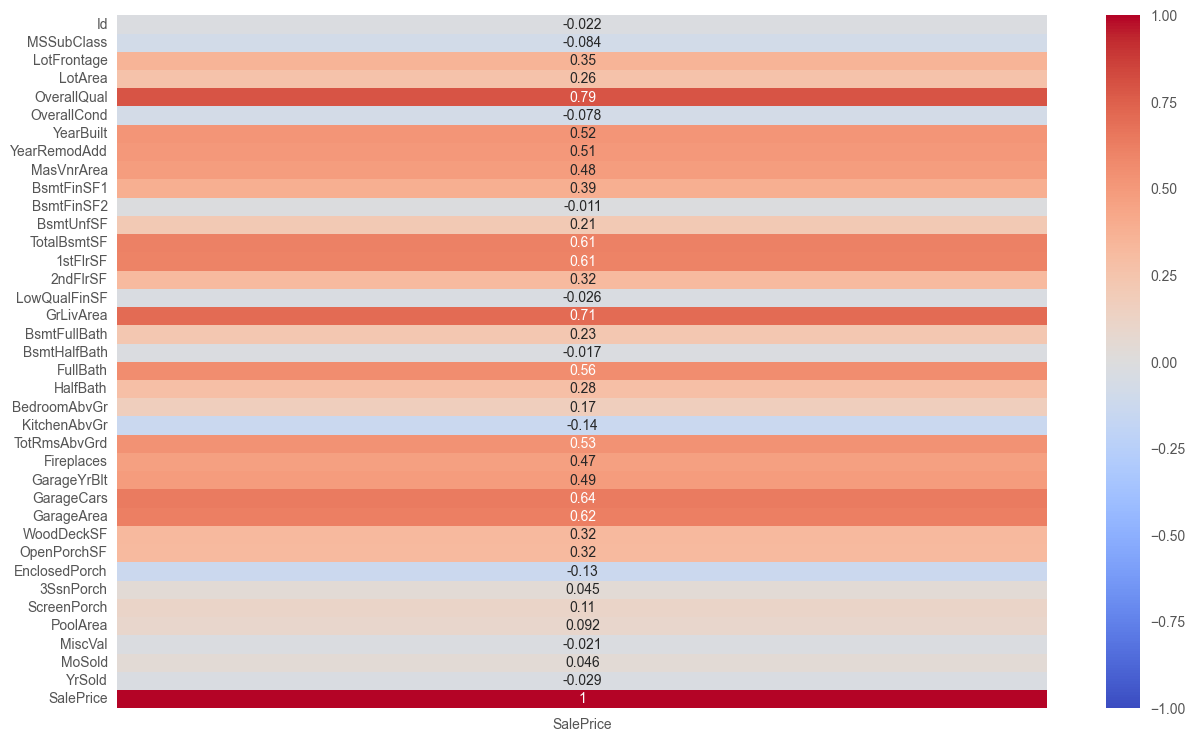

In [40]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

numeric_features = houses_df.select_dtypes(include=[np.number])

corr = numeric_features.corr()

selected_variable = corr['SalePrice']

#plot the heatmap
sns.heatmap(selected_variable.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

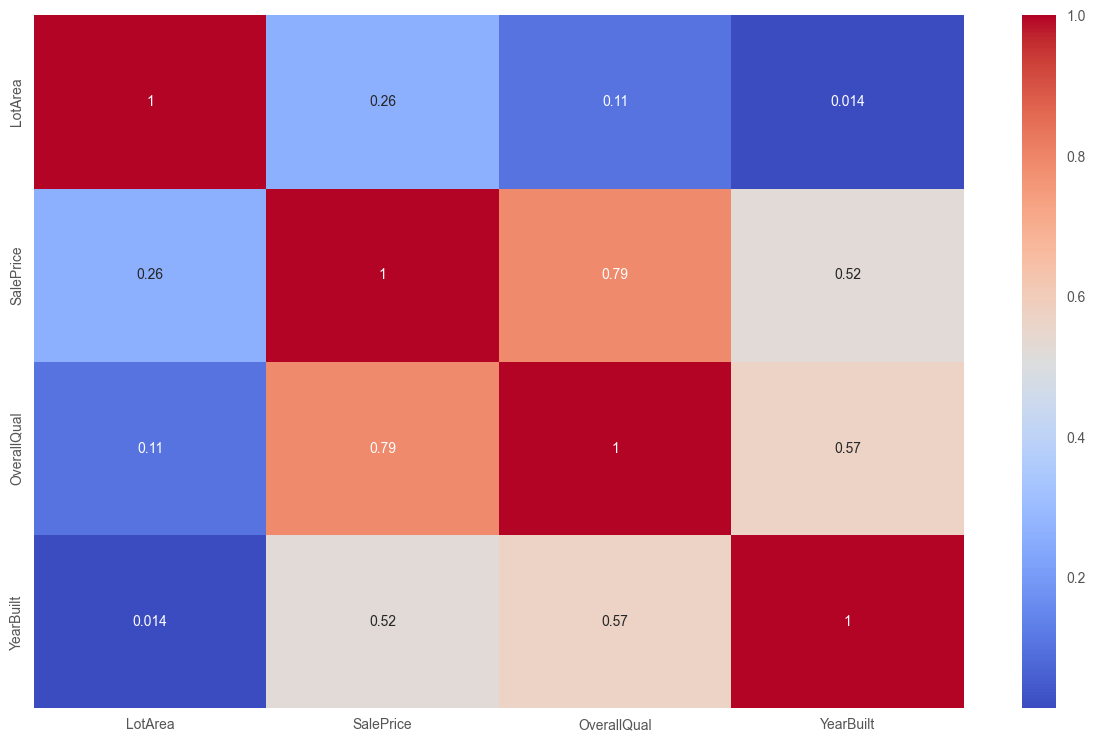

In [29]:
import seaborn as sns

selected_columns = houses_df[['LotArea', 'SalePrice', 'OverallQual', 'YearBuilt']]

correlation = selected_columns.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
